In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os


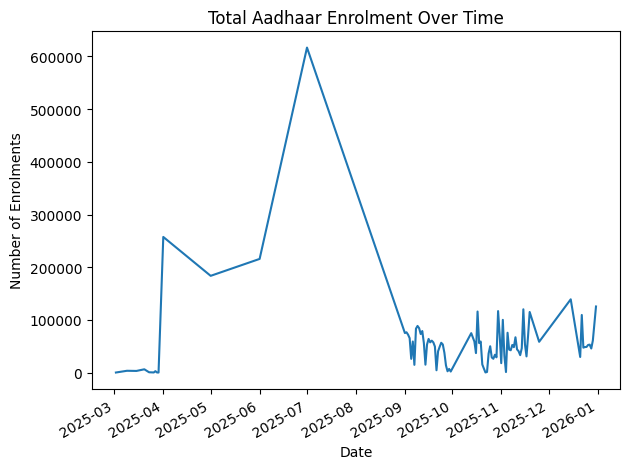

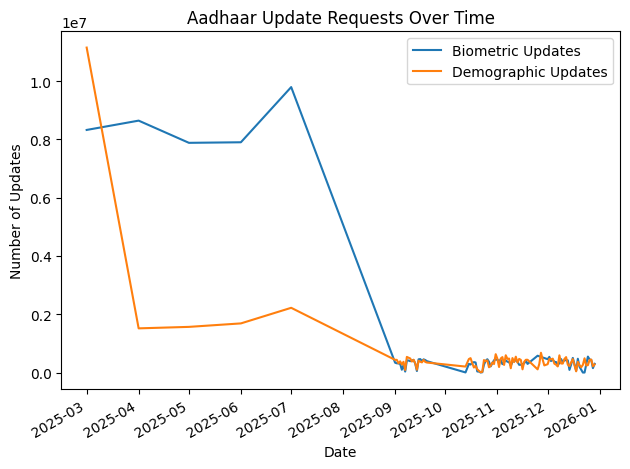

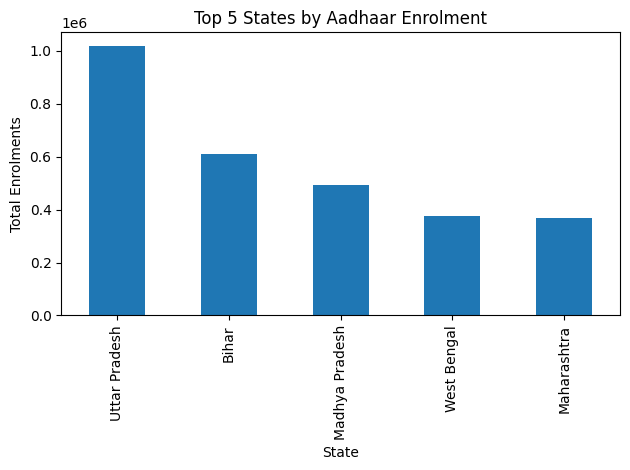

                             total_enrolments  total_updates  \
state                                                          
Daman & Diu                              21.0         2829.0   
Daman and Diu                           120.0         8315.0   
Andaman and Nicobar Islands             397.0        24501.0   
Chandigarh                             2723.0       157843.0   
Andhra Pradesh                       127681.0      6010097.0   
Chhattisgarh                         103219.0      4654163.0   
Dadra and Nagar Haveli                  744.0        33268.0   
Goa                                    2333.0       103517.0   
Manipur                               13456.0       584136.0   
ODISHA                                    1.0           84.0   

                             update_to_enrol_ratio  
state                                               
Daman & Diu                             128.590909  
Daman and Diu                            68.719008  
Andaman and Nicobar

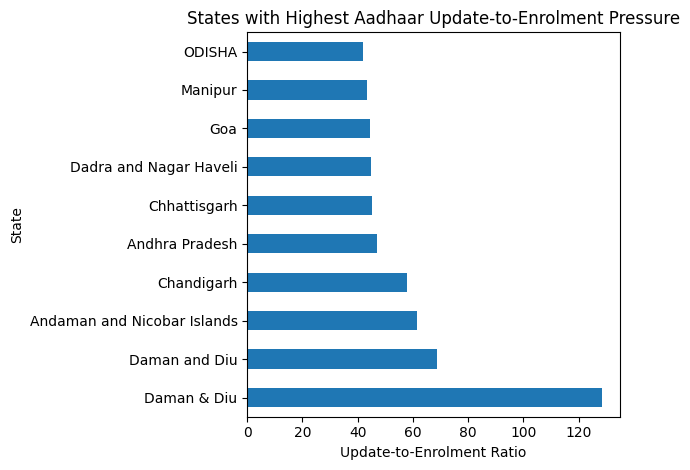

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Set working directory safely
if "__file__" in globals():
    os.chdir(os.path.dirname(os.path.abspath(__file__)))

# Load enrolment data
enrolment_files = glob.glob("api_data_aadhar_enrolment_*.csv")
enrolment_df = pd.concat([pd.read_csv(f) for f in enrolment_files], ignore_index=True)

# Load biometric update data
biometric_files = glob.glob("api_data_aadhar_biometric_*.csv")
biometric_df = pd.concat([pd.read_csv(f) for f in biometric_files], ignore_index=True)

# Load demographic update data
demographic_files = glob.glob("api_data_aadhar_demographic_*.csv")
demographic_df = pd.concat([pd.read_csv(f) for f in demographic_files], ignore_index=True)

# Convert date columns to datetime
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], dayfirst=True, errors='coerce')
biometric_df['date'] = pd.to_datetime(biometric_df['date'], dayfirst=True, errors='coerce')
demographic_df['date'] = pd.to_datetime(demographic_df['date'], dayfirst=True, errors='coerce')

# Sort data by date
enrolment_df = enrolment_df.sort_values('date')
biometric_df = biometric_df.sort_values('date')
demographic_df = demographic_df.sort_values('date')

# Total enrolment over time
enrolment_df['total_enrolment'] = (
    enrolment_df['age_0_5'] +
    enrolment_df['age_5_17'] +
    enrolment_df['age_18_greater']
)

enrolment_trend = enrolment_df.groupby('date')['total_enrolment'].sum()

plt.figure()
enrolment_trend.plot()
plt.title("Total Aadhaar Enrolment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Enrolments")
plt.tight_layout()
plt.savefig("figure_1_total_enrolment.png", dpi=300)
plt.show()

# Total biometric updates
biometric_df['total_biometric_updates'] = (
    biometric_df['bio_age_5_17'] +
    biometric_df['bio_age_17_']
)
biometric_trend = biometric_df.groupby('date')['total_biometric_updates'].sum()

# Total demographic updates
demographic_df['total_demographic_updates'] = (
    demographic_df['demo_age_5_17'] +
    demographic_df['demo_age_17_']
)
demographic_trend = demographic_df.groupby('date')['total_demographic_updates'].sum()

plt.figure()
biometric_trend.plot(label="Biometric Updates")
demographic_trend.plot(label="Demographic Updates")
plt.title("Aadhaar Update Requests Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.legend()
plt.tight_layout()
plt.savefig("figure_2_updates_over_time.png", dpi=300)
plt.show()

# Top 5 states by enrolment
state_enrolment = enrolment_df.groupby('state')['total_enrolment'].sum()
top5_states = state_enrolment.sort_values(ascending=False).head(5)

plt.figure()
top5_states.plot(kind='bar')
plt.title("Top 5 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.savefig("figure_3_top5_states_enrolment.png", dpi=300)
plt.show()

# State-wise total updates
state_bio_updates = biometric_df.groupby('state')['total_biometric_updates'].sum()
state_demo_updates = demographic_df.groupby('state')['total_demographic_updates'].sum()

state_total_updates = state_bio_updates.add(state_demo_updates, fill_value=0)

# Align enrolment and updates
state_analysis = pd.DataFrame({
    'total_enrolments': state_enrolment,
    'total_updates': state_total_updates
}).fillna(0).sort_index()

# Update-to-Enrolment Ratio (Capacity Stress Indicator)
state_analysis['update_to_enrol_ratio'] = (
    state_analysis['total_updates'] /
    (state_analysis['total_enrolments'] + 1)
)

# Top stressed states
top_stress_states = state_analysis.sort_values(
    'update_to_enrol_ratio', ascending=False
).head(10)

print(top_stress_states)

plt.figure()
top_stress_states['update_to_enrol_ratio'].plot(kind='barh')
plt.title("States with Highest Aadhaar Update-to-Enrolment Pressure")
plt.xlabel("Update-to-Enrolment Ratio")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("figure_5_update_enrol_pressure.png", dpi=300)
plt.show()

In [4]:
# Load enrolment data
enrolment_files = glob.glob("api_data_aadhar_enrolment_*.csv")
enrolment_df = pd.concat([pd.read_csv(f) for f in enrolment_files], ignore_index=True)

# Load biometric update data
biometric_files = glob.glob("api_data_aadhar_biometric_*.csv")
biometric_df = pd.concat([pd.read_csv(f) for f in biometric_files], ignore_index=True)

# Load demographic update data
demographic_files = glob.glob("api_data_aadhar_demographic_*.csv")
demographic_df = pd.concat([pd.read_csv(f) for f in demographic_files], ignore_index=True)


In [5]:
# Convert date columns
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], dayfirst=True, errors='coerce')
biometric_df['date'] = pd.to_datetime(biometric_df['date'], dayfirst=True, errors='coerce')
demographic_df['date'] = pd.to_datetime(demographic_df['date'], dayfirst=True, errors='coerce')

# Sort
enrolment_df = enrolment_df.sort_values('date')
biometric_df = biometric_df.sort_values('date')
demographic_df = demographic_df.sort_values('date')


In [6]:
# Total enrolment
enrolment_df['total_enrolment'] = (
    enrolment_df['age_0_5'] +
    enrolment_df['age_5_17'] +
    enrolment_df['age_18_greater']
)

# Total biometric updates
biometric_df['total_biometric_updates'] = (
    biometric_df['bio_age_5_17'] +
    biometric_df['bio_age_17_']
)

# Total demographic updates
demographic_df['total_demographic_updates'] = (
    demographic_df['demo_age_5_17'] +
    demographic_df['demo_age_17_']
)


In [7]:
# Monthly enrolment per state
monthly_enrolment = enrolment_df.groupby(
    ['state','date']
)['total_enrolment'].sum().reset_index()

# Monthly biometric updates per state
monthly_bio = biometric_df.groupby(
    ['state','date']
)['total_biometric_updates'].sum().reset_index()

# Monthly demographic updates per state
monthly_demo = demographic_df.groupby(
    ['state','date']
)['total_demographic_updates'].sum().reset_index()

# Merge update streams
monthly_updates = pd.merge(
    monthly_bio,
    monthly_demo,
    on=['state','date'],
    how='outer'
).fillna(0)

monthly_updates['total_updates'] = (
    monthly_updates['total_biometric_updates'] +
    monthly_updates['total_demographic_updates']
)


In [8]:
# Merge enrolment + updates
monthly = pd.merge(
    monthly_enrolment,
    monthly_updates[['state','date','total_updates']],
    on=['state','date'],
    how='inner'
)

# Service pressure indicator
monthly['service_pressure'] = (
    monthly['total_updates'] /
    (monthly['total_enrolment'] + 1)
)


In [9]:
monthly = monthly.sort_values(['state','date'])

monthly['pressure_change'] = (
    monthly.groupby('state')['service_pressure']
    .pct_change()
)


In [10]:
risk_states = (
    monthly.groupby('state')['pressure_change']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

risk_states


state
Tamil Nadu           6.011726
Karnataka            5.887498
Gujarat              2.242672
Jammu and Kashmir    1.741847
Meghalaya            1.709243
Kerala               1.653465
Ladakh               1.581489
Telangana            1.520224
Daman & Diu          1.443698
Assam                1.436143
Name: pressure_change, dtype: float64

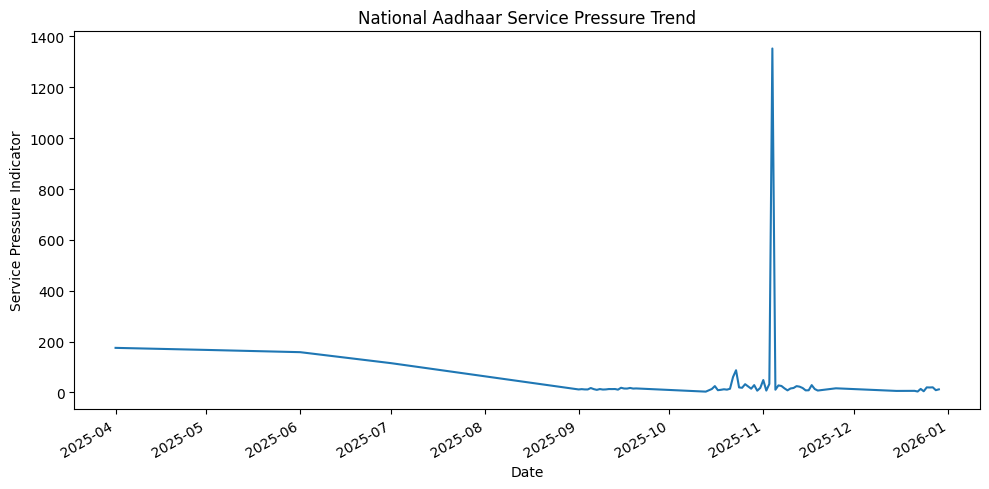

In [11]:
plt.figure(figsize=(10,5))
monthly.groupby('date')['service_pressure'].mean().plot()
plt.title("National Aadhaar Service Pressure Trend")
plt.xlabel("Date")
plt.ylabel("Service Pressure Indicator")
plt.tight_layout()
plt.show()


In [12]:
# Vulnerable population enrolment (children)
enrolment_df['child_enrolment'] = (
    enrolment_df['age_0_5'] +
    enrolment_df['age_5_17']
)

enrolment_df[['state', 'date', 'child_enrolment']].head()


,state,date,child_enrolment
0,Meghalaya,2025-03-02,72
32,West Bengal,2025-03-09,44
31,Uttar Pradesh,2025-03-09,125
30,West Bengal,2025-03-09,31
29,Bihar,2025-03-09,90


In [13]:
# Total biometric activity
biometric_df['total_bio'] = (
    biometric_df['bio_age_5_17'] +
    biometric_df['bio_age_17_']
)

# Child biometric participation ratio
biometric_df['child_bio_ratio'] = (
    biometric_df['bio_age_5_17'] /
    (biometric_df['total_bio'] + 1)
)

biometric_df[['state', 'date', 'child_bio_ratio']].head()


,state,date,child_bio_ratio
0,Haryana,2025-03-01,0.326340
14640,Uttar Pradesh,2025-03-01,0.777778
14639,West Bengal,2025-03-01,0.233831
14638,Gujarat,2025-03-01,0.252632
14637,Rajasthan,2025-03-01,0.506410


In [14]:
state_child_enrol = enrolment_df.groupby('state')['child_enrolment'].sum()
state_child_bio_ratio = biometric_df.groupby('state')['child_bio_ratio'].mean()

vulnerability_df = pd.DataFrame({
    'child_enrolment': state_child_enrol,
    'child_bio_ratio': state_child_bio_ratio
}).fillna(0)

vulnerability_df.head()


,child_enrolment,child_bio_ratio
state,,
100000,1.0,0.000000
Andaman & Nicobar Islands,114.0,0.140888
Andaman and Nicobar Islands,397.0,0.498128
Andhra Pradesh,126186.0,0.380629
Arunachal Pradesh,4193.0,0.503710


In [15]:
vulnerability_df['vulnerability_gap'] = (
    vulnerability_df['child_enrolment'] -
    vulnerability_df['child_bio_ratio']
)

vulnerability_df.sort_values('vulnerability_gap', ascending=False).head()


,child_enrolment,child_bio_ratio,vulnerability_gap
state,,,
Uttar Pradesh,1000727.0,0.541104,1.000726e+06
Bihar,597677.0,0.351477,5.976766e+05
Madhya Pradesh,484371.0,0.406603,4.843706e+05
West Bengal,366787.0,0.296152,3.667867e+05
Maharashtra,360930.0,0.362498,3.609296e+05


In [16]:
top_vulnerable_states = vulnerability_df.sort_values(
    'vulnerability_gap', ascending=False
).head(10)

top_vulnerable_states


,child_enrolment,child_bio_ratio,vulnerability_gap
state,,,
Uttar Pradesh,1000727.0,0.541104,1.000726e+06
Bihar,597677.0,0.351477,5.976766e+05
Madhya Pradesh,484371.0,0.406603,4.843706e+05
West Bengal,366787.0,0.296152,3.667867e+05
Maharashtra,360930.0,0.362498,3.609296e+05
Rajasthan,342903.0,0.466212,3.429025e+05
Gujarat,264213.0,0.347879,2.642127e+05
Tamil Nadu,219540.0,0.427998,2.195396e+05
Karnataka,213125.0,0.367908,2.131246e+05


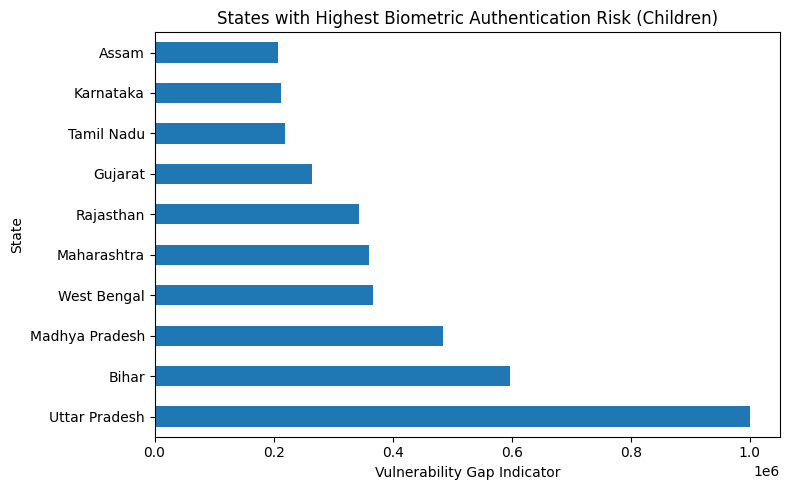

In [17]:
plt.figure(figsize=(8,5))
top_vulnerable_states['vulnerability_gap'].plot(kind='barh')
plt.title("States with Highest Biometric Authentication Risk (Children)")
plt.xlabel("Vulnerability Gap Indicator")
plt.ylabel("State")
plt.tight_layout()
plt.show()
